# Machine Learning Project

## Student Social Media Addiction with Machine Learning

Social media usage among students varies widely in terms of daily screen time, platform preference, sleep patterns, and academic impact. This project uses Linear Regression to analyze these factors and predict students’ social media addiction scores, with the aim of understanding how usage behavior and lifestyle variables contribute to addictive tendencies.

### Project Objectives

- Perform Exploratory Data Analysis (EDA) to identify patterns, trends, and relationships in students’ social media usage behavior.
- Clean and preprocess the dataset using encoding and scaling techniques to prepare it for machine learning.
- Select the most relevant features influencing social media addiction scores.
- Build and train Linear Regression and K-Nearest Neighbors (KNN) Regression models to predict addiction levels.
- Evaluate model performance using R² Score and Mean Absolute Error (MAE).


## Exploratory Data Analysis 

Loading the libraries required for the analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [54]:
df=pd.read_csv(r"C:\Users\Lenovo\Data Analytics\Dataset\Students Social Media Addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


## Understanding the data
Understanding the data is a crucial first step in the analysis process. It helps identify key features, data types, and underlying patterns, providing a strong foundation for effective visualization and machine learning modeling.

In [3]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [5]:
df.shape

(705, 13)

In [6]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [7]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

## Dropping Unwanted Columns

Some columns do not contribute meaningful insights to the analysis or predictive modeling process. Therefore, these unnecessary features are removed to reduce noise and improve model performance.
- **Student_ID**: Acts only as a unique identifier and does not provide predictive value for the model.
- **Conflicts_Over_Social_Media**: Subjective in nature and may introduce noise without directly improving addiction score prediction.
- **Country**: Highly categorical with limited relevance to individual addiction behavior in this dataset.


In [8]:
df.drop(columns=['Student_ID','Conflicts_Over_Social_Media',"Country"],inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Addicted_Score'],
      dtype='object')

## 1. Identifying the Null Values
Identifying null values is an essential step in data preprocessing, as missing data can affect analysis accuracy and model performance. Detecting these values early helps determine the appropriate handling strategy.

In [10]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Addicted_Score                  0
dtype: int64

This dataset dosen't contain any null values

## Handling the Outliers

Handling outliers is an important step in data preprocessing, as extreme values can influence statistical analysis and machine learning model performance. Identifying and evaluating outliers helps decide whether they should be treated or retained based on their relevance.

- We are plotting a boxplot to observe the outliers.

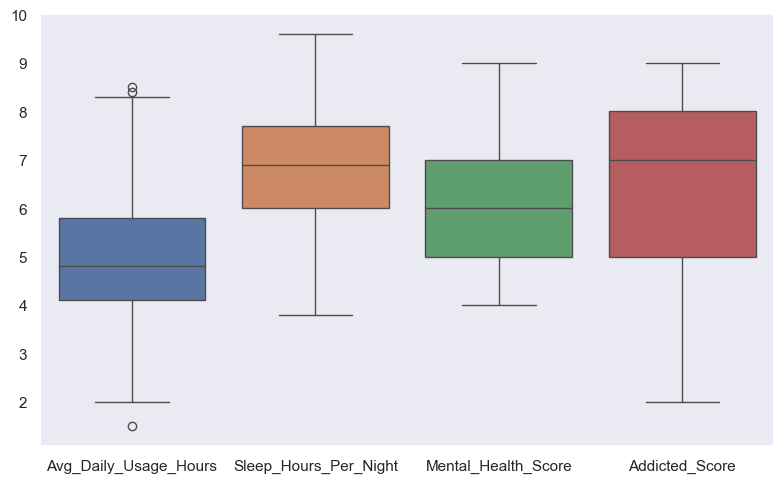

In [63]:
col=["Avg_Daily_Usage_Hours",'Sleep_Hours_Per_Night','Mental_Health_Score','Addicted_Score']
plt.figure(figsize=(8,5))
sns.boxplot(data=df[col])
plt.tight_layout()

From the boxplot analysis, it is evident that `Avg_Daily_Usage_Hours contains` only a small number of outliers, indicating that most observations fall within a reasonable range.

Identifying those outliers...

In [12]:
Q1=np.percentile(df['Avg_Daily_Usage_Hours'],25,method='midpoint')
Q3=np.percentile(df['Avg_Daily_Usage_Hours'],75,method='midpoint')
IQR=Q3-Q1
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

outliers=[]
for i in df['Avg_Daily_Usage_Hours']:
    if ((i>upper_limit) or (i<lower_limit)):
        outliers.append(i)

print(outliers)

[1.5, 8.4, 8.5]


The outliers were retained because they represent realistic and valid variations in daily social media usage rather than data errors.

## Visualization 

Visualization is used to explore patterns, trends, and relationships within the dataset. By visualizing the data, we gain a clearer understanding of student behavior and identify insights that guide further analysis and modeling.m

- The first step in visualization is identifying the target column. In this project, the target column is the **Addiction_Score**.

#### Questions to Answer
- Does increased social media usage lead to higher addiction levels?
- How does social media addiction affect sleep and mental health?
- Are certain social media platforms more addictive than others?
- What is the impact of social media addiction on academic performance?

In [13]:
sns.set_theme(style='dark',context='notebook',palette='deep')

### Histogram – Daily Social Media Usage Distribution

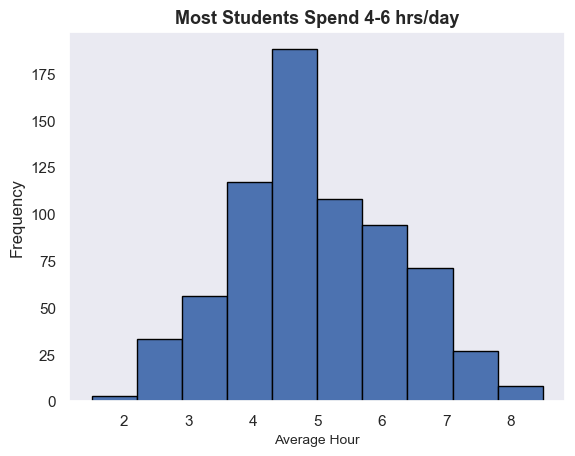

In [64]:
df['Avg_Daily_Usage_Hours'].plot(kind='hist',edgecolor='black')
plt.title('Most Students Spend 4-6 hrs/day',fontsize=13, fontweight='bold')
plt.xlabel("Average Hour",fontsize=10)
plt.savefig("a.png", dpi=300, bbox_inches="tight")
plt.show()

- **Most students spend around 4 to 6 hours every day on social media, which shows that daily usage is quite high among students. Most students spend 4–6 hours per day on social media**
- **Only a few students spend very little time on social media, while some students spend more than 7 hours a day, showing that a small group are heavy users.**
- **Since many students use social media for several hours daily, it has become a regular habit for most students, which may affect their studies, sleep, or mental health.**

### Histogram - Distribution of Social Media Addiction Scores

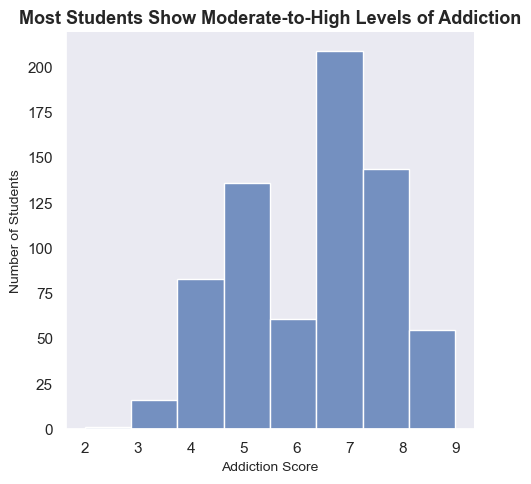

In [68]:
sns.displot(x='Addicted_Score', bins=8, data=df)
plt.xlabel("Addiction Score", fontsize=10)
plt.ylabel("Number of Students", fontsize=10)
plt.title("Most Students Show Moderate-to-High Levels of Addiction", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("c.png", dpi=300, bbox_inches="tight")
plt.show()

- **A large proportion of students have an addiction score of 7, indicating that moderate-to-high levels of social media addiction are common among students.**

### Bar Chart - Most Used Social Media Platforms Among Students

We are finding out the top used 5 platforms

In [16]:
platform=df['Most_Used_Platform'].value_counts().head(5).index
print(platform)

Index(['Instagram', 'TikTok', 'Facebook', 'WhatsApp', 'Twitter'], dtype='object', name='Most_Used_Platform')


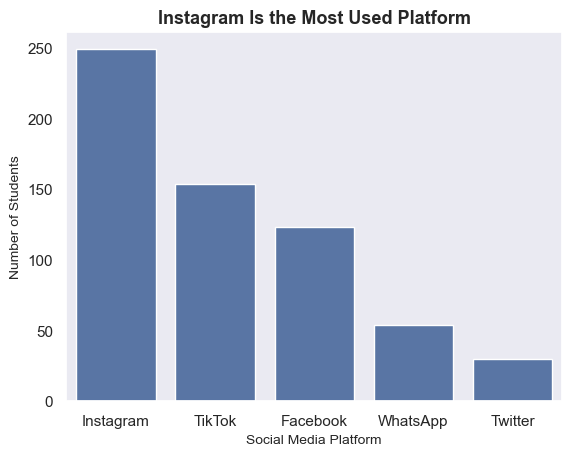

In [67]:
sns.countplot(x='Most_Used_Platform', data=df, order=platform)
plt.xlabel("Social Media Platform", fontsize=10)
plt.ylabel("Number of Students", fontsize=10)
plt.title("Instagram Is the Most Used Platform", fontsize=13, fontweight='bold')

- **Instagram is the most used social media platform among students, with a significantly higher number of users compared to all other platforms.**
- **Platforms like WhatsApp and Twitter are used by fewer students, indicating that students mainly prefer content-driven and entertainment-focused platforms over messaging or text-based platforms.**

### Regression Plot – Addiction Score vs Sleep Hours per Night

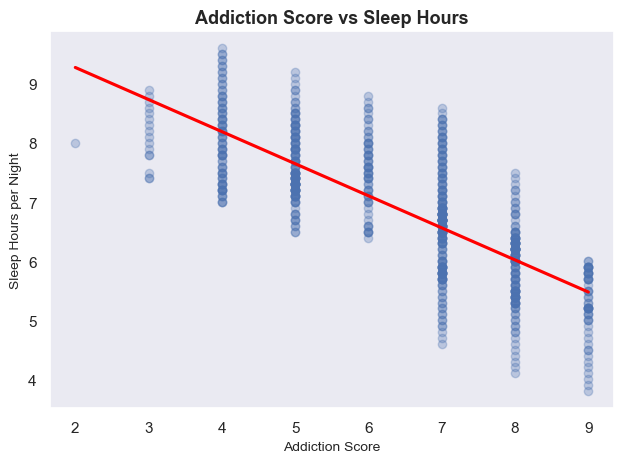

In [69]:
sns.regplot(x='Addicted_Score',y='Sleep_Hours_Per_Night',data=df,line_kws={'color': 'red'},ci=None,scatter_kws={'alpha': 0.3})
plt.xlabel("Addiction Score", fontsize=10)
plt.ylabel("Sleep Hours per Night", fontsize=10)
plt.title("Addiction Score vs Sleep Hours", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("d.png", dpi=300, bbox_inches="tight")
plt.show()

-  **There is a clear negative relationship between addiction score and sleep hours, meaning that as social media addiction increases, students tend to sleep less.**

- **Students with lower addiction scores (2–4) generally get 7 to 9 hours of sleep, while students with higher addiction scores (7–9) often sleep between 4 to 6 hours, showing a noticeable drop in sleep duration.**

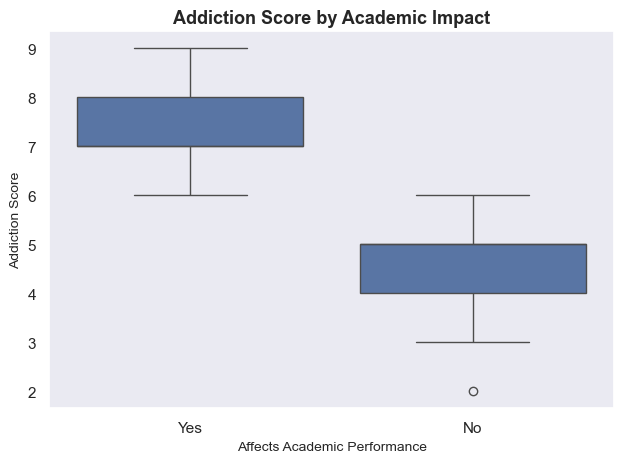

In [70]:
sns.boxplot(x='Affects_Academic_Performance', y='Addicted_Score', data=df)
plt.xlabel("Affects Academic Performance", fontsize=10)
plt.ylabel("Addiction Score", fontsize=10)
plt.title("Addiction Score by Academic Impact", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("e.png", dpi=300, bbox_inches="tight")
plt.show()

- **The median addiction score for students whose academics are affected is around 7–8, while it is around 4–5 for students whose academics are not affected, showing a clear difference between the two groups.**.

### Bar Plot – Addiction Score by Academic Level and Gender

In [20]:
df['Gender'].value_counts()

Gender
Female    353
Male      352
Name: count, dtype: int64

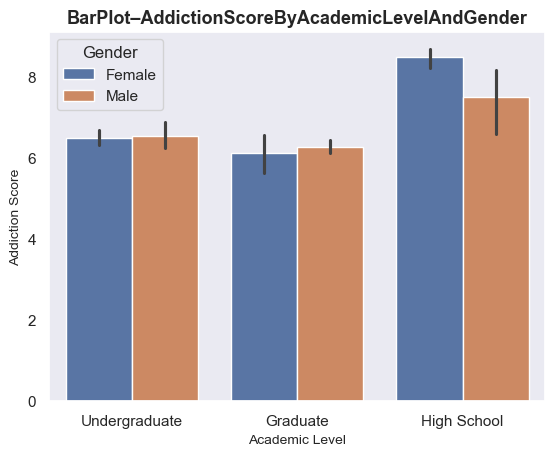

In [71]:
sns.barplot(x='Academic_Level', y='Addicted_Score', data=df, hue='Gender')
plt.xlabel("Academic Level", fontsize=10)
plt.ylabel("Addiction Score", fontsize=10)
plt.title("BarPlot–AddictionScoreByAcademicLevelAndGender", fontsize=13, fontweight='bold')
plt.savefig("f.png", dpi=300, bbox_inches="tight")
plt.show()

- **Across all academic levels, high school students show the highest addiction scores, indicating that younger students tend to have higher social media addiction compared to graduate and undergraduate students.**
- **Within each academic level, male students generally have slightly higher addiction scores than female students, though the difference is relatively small for undergraduate and graduate levels.**
- **But in High School Socail Media Addiction Are Higher Among Females**

### Bar Plot – Addiction Score by Relationship Status

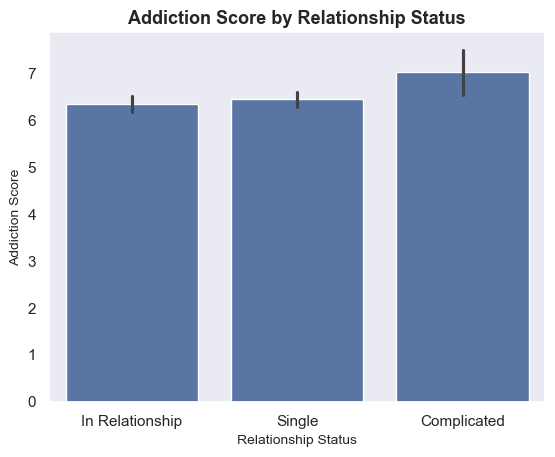

In [72]:
sns.barplot(x='Relationship_Status', y='Addicted_Score', data=df)
plt.xlabel("Relationship Status", fontsize=10)
plt.ylabel("Addiction Score", fontsize=10)
plt.title("Addiction Score by Relationship Status", fontsize=13, fontweight='bold')
plt.savefig("g.png", dpi=300, bbox_inches="tight")
plt.show()

- **Students with a complicated relationship status have the highest average addiction score compared to students who are single or in a relationship.**
- **The higher addiction score among students with complicated relationships suggests that emotional stress or relationship issues may lead to increased social media usage**

### Heatmap – Correlation Between Numerical Features


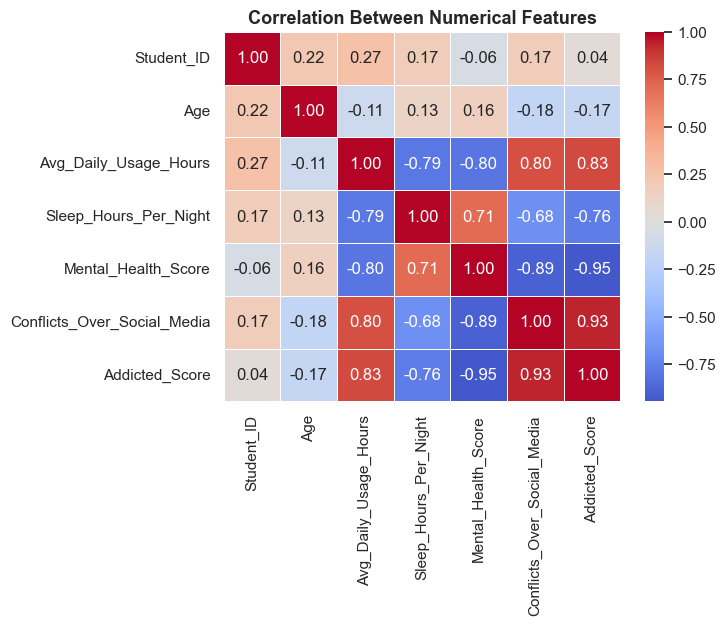

In [73]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5, center=0, cmap='coolwarm')
plt.title("Correlation Between Numerical Features", fontsize=13, fontweight='bold')
plt.savefig("h.png", dpi=300, bbox_inches="tight")
plt.show()

- **Addiction score has a strong positive correlation with average daily usage hours (0.83), meaning students who spend more time on social media tend to have much higher addiction levels.**
- **Addiction score is strongly negatively correlated with sleep hours (-0.76) and mental health score (-0.95), indicating that higher social media addiction is associated with less sleep and poorer mental health.**

### Splitting into Train-Test Split

Before building the machine learning model, the dataset is split into training and testing sets. This allows the model to learn patterns from one portion of the data and be evaluated on unseen data to measure its real-world performance.

Why Train-Test Split is Performed Before Encoding:
- Performing the split before encoding helps prevent data leakage, ensuring that information from the test set does not influence the training process.

First, we need to split the dataset into two seperate dataframe
- Depentant dataframe
- Indepentant dataframe

In [24]:
x=df.drop(columns=['Addicted_Score'])
x=pd.DataFrame(x)
x.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship


In [25]:
y=df['Addicted_Score']
y=pd.DataFrame(y)
y.head()

,Addicted_Score
0,8
1,3
2,9
3,4
4,7


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
x_train.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status
371,22,Male,Graduate,3.5,Facebook,No,8.3,8,In Relationship
176,19,Female,Undergraduate,4.9,Facebook,No,7.5,7,Single
399,22,Male,Graduate,4.6,TikTok,Yes,7.6,6,Single
215,22,Male,Graduate,4.4,Facebook,No,8.8,7,In Relationship
568,19,Female,Undergraduate,7.4,WhatsApp,Yes,5.4,5,In Relationship


In [28]:
x_test.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status
478,20,Female,Undergraduate,3.0,Instagram,No,9.0,7,In Relationship
81,19,Female,Undergraduate,4.8,TikTok,Yes,5.7,6,Single
77,22,Female,Graduate,2.9,Facebook,No,7.0,7,In Relationship
208,19,Female,Undergraduate,4.2,Instagram,Yes,7.8,5,Single
319,22,Male,Graduate,3.1,Facebook,No,8.4,8,In Relationship


In [ ]:
### Encoding

- Encoding is the process of converting categorical variables into numerical representations so that they can be interpreted by machine learning algorithms. It is a crucial data preprocessing step that prepares raw data for effective model training.
- Here, we are using **Label Encoding** and **One-Hot Encoding** to perform this transformation.

df.select_dtypes('object').columns

Importing Label Encoder...

from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
le_academic=LabelEncoder()

x_train["Gender"] = le_gender.fit_transform(x_train["Gender"])
x_test["Gender"] = le_gender.transform(x_test["Gender"])

x_train["Affects_Academic_Performance"] = le_academic.fit_transform(x_train["Affects_Academic_Performance"])
x_test["Affects_Academic_Performance"] = le_academic.transform(x_test["Affects_Academic_Performance"])                                                               

cols=['Academic_Level','Most_Used_Platform','Relationship_Status']
xtrainencoded=pd.get_dummies(x_train,columns=cols,drop_first=True)
xtestencoded=pd.get_dummies(x_test,columns=cols,drop_first=True)

x_train= xtrainencoded.astype(int)
x_test = xtestencoded.astype(int)

x_train.head()

x_test.head()

### Scaling

Scaling is the process of transforming numerical features to a common scale so that no single feature dominates the model due to its magnitude. It helps machine learning algorithms perform better and converge faster.

Here, we are using **Min-Max Scaling**.

**Why Min-Max Scaling?**
- It scales features to a **fixed range (usually 0 to 1)**, making the data easier for distance-based and gradient-based models to interpret.
- It preserves the **original distribution and relative relationships** between values, which is useful when the data does not contain extreme outliers.

In [35]:
df.select_dtypes('number').columns

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Addicted_Score'],
      dtype='object')

Importing Min Max Scaler...

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [37]:
col=['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night','Mental_Health_Score']

In [38]:
x_train[col]=minmax.fit_transform(x_train[col])
x_test[col]=minmax.transform(x_test[col])

In [39]:
x_train.head()

,Age,Gender,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
371,0.666667,1,0.166667,0,0.833333,1.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
176,0.166667,0,0.333333,0,0.666667,0.75,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
399,0.666667,1,0.333333,1,0.666667,0.50,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
215,0.666667,1,0.333333,0,0.833333,0.75,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
568,0.166667,0,0.833333,1,0.333333,0.25,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
x_test.head()

,Age,Gender,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
478,0.333333,0,0.166667,0,1.000000,0.75,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
81,0.166667,0,0.333333,1,0.333333,0.50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
77,0.666667,0,0.000000,0,0.666667,0.75,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
208,0.166667,0,0.333333,1,0.666667,0.25,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
319,0.666667,1,0.166667,0,0.833333,1.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Machine Learning

Machine learning is used to predict outcomes by training models to learn patterns and relationships from data. Based on these learned patterns, the models can make predictions on unseen data.

In this project, **Linear Regression** is used because the target variable (**Addicted_Score**) is continuous. Additionally, Linear Regression provides a simple and interpretable baseline model to understand how different features influence the predicted addiction score.

We also use **KNN Regression** to validate the results and ensure the robustness of the predictions. By comparing the performance of both models, we gain confidence in the model’s ability to generalize and capture both linear and non-linear relationships in the data.

### Linear Regression

Importing `Linear Regression` Model

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

Training the model using `x_train` and `y_train` 

In [42]:
model=lr.fit(x_train,y_train)

Predicting `y_test` using the model.

In [43]:
ypred=model.predict(x_test)

In [44]:
ypred

array([[4.80020291],
       [7.20370613],
       [4.87865523],
       [7.52268904],
       [4.19275558],
       [8.3795646 ],
       [3.02247159],
       [4.40792763],
       [5.19226468],
       [7.10530574],
       [7.65221586],
       [7.39124296],
       [8.49997708],
       [7.07174105],
       [4.33415378],
       [5.26193821],
       [4.56867857],
       [6.99774277],
       [7.5533182 ],
       [7.87350401],
       [4.98314718],
       [8.14131002],
       [8.24220768],
       [8.41067522],
       [4.02406671],
       [5.04385875],
       [6.78077937],
       [7.34509343],
       [5.07606345],
       [6.98860723],
       [9.22557305],
       [6.78077937],
       [6.68959103],
       [6.17249684],
       [8.10028765],
       [7.15298838],
       [7.10096519],
       [7.52268904],
       [7.10096519],
       [5.12122393],
       [7.36081624],
       [5.15185308],
       [6.66036689],
       [6.78077937],
       [7.60702577],
       [4.87440363],
       [9.23405665],
       [5.934

- Here, `ypred` is the predicted column
- Which is equivalent to `y_test`

In [45]:
y_test

,Addicted_Score
478,5
81,7
77,5
208,7
319,4
...,...
377,7
497,7
244,9
239,4


- **R² Score**: Measures how well the model explains the variance in the target variable.
- **Mean Absolute Error (MAE)**: Represents the average absolute difference between predicted and actual values.

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error
r2=r2_score(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
print('r2 score:', r2)
print('Mean absolute error:', mae)
print("Intercept:", lr.intercept_)

r2 score: 0.956477066350994
Mean absolute error: 0.2444979174885596
Intercept: [7.63577371]


- The R² score indicates that the model explains approximately 95% of the variance in the target variable, showing a strong fit.
- The low Mean Absolute Error (MAE) suggests that the model’s predictions are close to the actual addiction scores.
- Overall, the model demonstrates strong predictive performance on unseen test data.
- The intercept represents the baseline addiction score predicted by the model when all input features are zero.

## KNN Regression

- In addition to Linear Regression, KNN Regression is applied to validate and cross-check the model’s predictions.
- KNN helps capture potential non-linear relationships that Linear Regression may not fully represent.
- Using both models improves confidence in the robustness and reliability of the results.

Importing `K-Nearest Neighbors (KNN) Regression` Model

from sklearn.neighbors import KNeighborsRegressor

metric_k = []

neighbors = np.arange(1, 15)

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    model = knn.fit(x_train, y_train)
    ypred_knn = model.predict(x_test)
    r = r2_score(y_test, ypred_knn)
    metric_k.append(r)

### KNN Model Evaluation

To evaluate the performance of the K-Nearest Neighbors (KNN) Regression model, we test multiple values of **K** (number of neighbors).

- **`neighbors`** is created using `np.arange(1, 15)` to generate a range of possible K values. Testing different values of K helps identify the optimal neighborhood size for prediction.
- For each value of K, a KNN regressor is trained using the training dataset.
- The trained model predicts addiction scores for the test dataset.
- The **R² score** is calculated to measure how well the model explains the variance in the target variable.
- **`metric_k`** is used to store the R² score corresponding to each value of K.

By comparing the values stored in `metric_k`, we can determine the value of K that provides the best predictive performance while avoiding underfitting and overfitting.

Training the model using `x_train` and `y_train`

metric_k

We are plotting a line chart with the number of neighbors (K) on the x-axis and the corresponding R² scores (`metric_k`) on the y-axis to observe how the model’s performance varies with different values of K.

plt.plot(neighbors,metric_k,'o-')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("R² Score")
plt.title("R² Score vs Number of Neighbors (K)")
plt.grid()
plt.show()

Although the highest R² score is observed below K = 2, K = 3 is selected as it provides comparable performance with improved stability.

- Training the model using K = 3.

knn=KNeighborsRegressor(n_neighbors=3)
model=knn.fit(x_train,y_train)
ypred_knn=model.predict(x_test)

Importing `r2_score` and `mean_squared_error` to evaluate the performance of the regression model.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('r2 score:',r2_score(y_test,ypred_knn))
print('mean squared error:',mean_squared_error(y_test,ypred_knn))

- The R² score of approximately 0.94 indicates that the model explains about 93% of the variance in the target variable, demonstrating strong predictive performance.
- The low Mean Squared Error (0.12) suggests that the predicted values are very close to the actual values, indicating minimal prediction error.
- Together, these metrics show that the model generalizes well to unseen data and is effective for predicting the target variable.

### Final Insights

- The student social media addiction dataset was thoroughly analyzed using Exploratory Data Analysis (EDA), including missing value detection, outlier evaluation, and multiple visualizations to understand usage patterns and behavioral trends.
- Careful feature selection and preprocessing such as encoding categorical variables and applying Min-Max scaling helped improve model stability and performance.
- **Linear Regression** achieved a high R² score of approximately **0.95** with a low Mean Absolute Error, indicating a strong linear relationship between the selected features and the addiction score.
- The **intercept** from the Linear Regression model represents the baseline addiction score when all input features are zero, providing useful interpretability.
- **KNN Regression** achieved an R² score of approximately **0.94** with low prediction error, confirming that the model captures local and non-linear patterns in the data.
- The close performance of both models demonstrates strong generalization on unseen data and increases confidence in the robustness of the predictions.
- Overall, this project highlights effective data preprocessing, model comparison, and reliable prediction of student social media addiction levels.
